In [1]:
# read data
import pandas as pd
choc = pd.read_csv('HeavenlyChocolates.csv')

In [2]:
##observe data
choc.head()

,Customer,Day,Browser,Time,Pages_Viewed,Amount_Spent
0,1,Mon,Chrome,12.0,4,54.52
1,2,Wed,Other,19.5,6,94.90
2,3,Mon,Chrome,8.5,4,26.68
3,4,Tue,Firefox,11.4,2,44.73
4,5,Wed,Chrome,11.3,4,66.27


In [12]:
'''
1.Using the techniques we have learned in class so far (i.e. DON’T use groupby() method),
create a dataframe that shows the number of visits to Heavenly Chocoloate’s website using different
browsers. Your output should be similar to the following table.
'''
chrome_view = 0
firefox_view = 0
other_view = 0
for i in choc['Browser']:
    if i == 'Chrome':
        chrome_view = chrome_view +1
    if i == 'Firefox':
        firefox_view =firefox_view +1
    if i == 'Other':
        other_view =other_view+1

web_view = {'Browser':['Chrome','Firefox','Other'],'Count':[chrome_view,firefox_view,other_view]}
web=pd.DataFrame(web_view)
web

,Browser,Count
0,Chrome,27
1,Firefox,16
2,Other,7


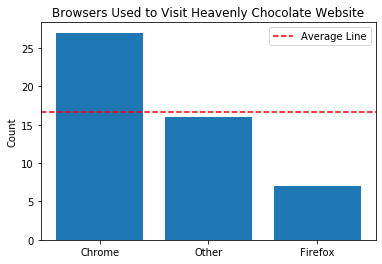

In [6]:
'''
2.Create a duplicate of the following graph to show which browser is used more by the 1
Heavenly Chocolate website visitors? The dashed line represents the mean of count visits for all browsers
in the dataset.
'''
import matplotlib.pyplot as plt
plt.figure()
plt.bar(web.Browser,web.Count)
plt.axhline(y=web.Count.mean(), color='red',linestyle='--', label='Average Line')
plt.ylabel('Count')
plt.title('Browsers Used to Visit Heavenly Chocolate Website')
plt.legend()
plt.show()

[]

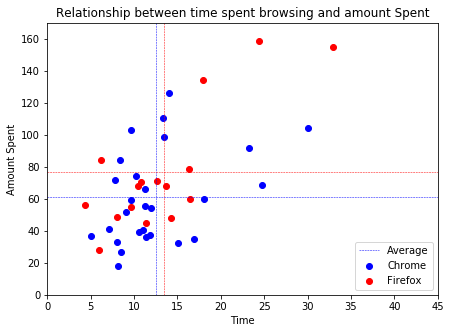

In [7]:
'''
3.Create an duplicate of the following scatterplot that shows the relationship between the
time spent browsing, and the amount spent buying using either Firefox or Chrome browswers. What
does this plot tell you about the company’s revenues using both channels?
'''
plt.figure(figsize=(7,5))
chrome = choc[choc['Browser']=='Chrome']
firefox = choc[choc['Browser']=='Firefox']
plt.scatter(chrome.Time,chrome.Amount_Spent,color='blue',label='Chrome')
plt.scatter(firefox.Time, firefox.Amount_Spent,color='red',label='Firefox')
plt.axvline(x=chrome.Time.mean(),color='blue',linestyle='--', label='Average',linewidth=0.5)
plt.axvline(x=firefox.Time.mean(),color='red',linestyle='--', linewidth=0.5)
plt.axhline(y=chrome.Amount_Spent.mean(),color='blue',linestyle='--', linewidth=0.5)
plt.axhline(y=firefox.Amount_Spent.mean(),color='red',linestyle='--', linewidth=0.5)
plt.xlim((0,45))
plt.ylim((0,170))
plt.xlabel('Time')
plt.ylabel('Amount Spent')
plt.title('Relationship between time spent browsing and amount Spent')
plt.legend(loc=4)
plt.plot()

In [8]:
'''
4. Create the following chart which shows the number of website visitors per day for people
using Chrome or Firefox
'''
chrome = choc[choc['Browser']=='Chrome']
firefox = choc[choc['Browser']=='Firefox']
weekly = ['Mon',"Tue",'Wed','Thu','Fri','Sat','Sun']
c_list=[]
f_list = []
for i in weekly:
    c_list.append(chrome[chrome['Day']==i]['Customer'].count())
for i in weekly:
    f_list.append(firefox[firefox['Day']==i]['Customer'].count())


chrome_view = {'Day':weekly,'Visit Count':c_list}
firefox_view = {'Day':weekly,'Visit Count':f_list}

chrome_visit =pd.DataFrame(chrome_view)
firefox_visit = pd.DataFrame(firefox_view)
firefox_visit

,Day,Visit Count
0,Mon,2
1,Tue,2
2,Wed,1
3,Thu,1
4,Fri,6
5,Sat,3
6,Sun,1


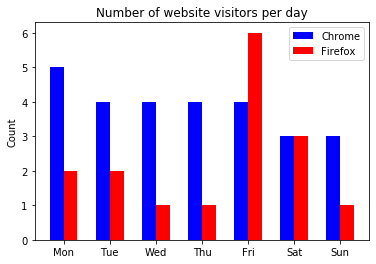

In [10]:
import numpy as np
plt.figure()
pos = np.arange(len(chrome_visit.Day))
barwidth= 0.3
plt.bar(pos-barwidth/2, chrome_visit['Visit Count'], width =barwidth, color='blue',label='Chrome')
plt.bar(pos+barwidth/2, firefox_visit['Visit Count'], width =barwidth, color='red',label='Firefox')

plt.legend()
ax =plt.gca()
ax.set_xticklabels(['Nan','Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'])
plt.ylabel('Count')
plt.title('Number of website visitors per day')
plt.show()